In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.svm as svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [61]:
# dataset 작업요
#df = pd.read_csv('Feature.csv', index_col=0)
#df.reset_index(drop=False, inplace=True)
#df.head()

In [133]:
# dataset 작업요
df = pd.read_csv('credit_data.csv', index_col=0)
df.head(2)

,TARGET,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,주거 형태,...,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수,인구수,도시구분,소득수준
0,0,2,1,1,2,18054000.0,5,0,0,3,...,0,1,4.0,5,39,1000,23.0,256685,3,2
1,0,1,1,0,0,59472000.0,1,1,0,3,...,0,4,2.0,16,45,4,16.0,933020,1,3


In [134]:
# 조건 설정
conditions = [
(df['차량 소유 여부'] == 0) & (df['부동산 소유 여부'] == 0),
(df['차량 소유 여부'] == 0) & (df['부동산 소유 여부'] == 1),
(df['차량 소유 여부'] == 1) & (df['부동산 소유 여부'] == 0),
(df['차량 소유 여부'] == 1) & (df['부동산 소유 여부'] == 1)
]
# 할당할 값 설정
values = [1, 2, 3, 4]
# np.select를 사용하여 조건에 맞는 값을 'y' 컬럼에 할당
df['car_home'] = np.select(conditions, values, default=0)

In [122]:
#df['가입년수'] = pd.cut(df['가입연수'], bins=[0.0, 4.0, 9.0, 14.0, 19.0, 24.0, 29.0, 34.0, 39.0, 44.0, float('inf')],
#                      labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], include_lowest=True)

In [123]:
#df['가입년수'] = df['가입년수'].astype(int)

In [135]:
# 조건 설정
conditions = [
(df['부동산 소유 여부'] == 0) & (df['주거 형태'] == 0),
(df['부동산 소유 여부'] == 0) & (df['주거 형태'] == 1),
(df['부동산 소유 여부'] == 0) & (df['주거 형태'] == 2),
(df['부동산 소유 여부'] == 0) & (df['주거 형태'] == 3),
(df['부동산 소유 여부'] == 1) & (df['주거 형태'] == 0),
(df['부동산 소유 여부'] == 1) & (df['주거 형태'] == 1),
(df['부동산 소유 여부'] == 1) & (df['주거 형태'] == 2),
(df['부동산 소유 여부'] == 1) & (df['주거 형태'] == 3),
]
# 할당할 값 설정
values = [1, 2, 3, 4, 5, 6, 7, 8]
# np.select를 사용하여 조건에 맞는 값을 'y' 컬럼에 할당
df['home_shape'] = np.select(conditions, values, default=0)
df = df.drop(['차량 소유 여부', '부동산 소유 여부', '주거 형태', '근속연수'], axis=1)
df.head(2)

,TARGET,성별,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,...,직업,가족 구성원 수,산업군,나이,가입연수,인구수,도시구분,소득수준,car_home,home_shape
0,0,2,2,18054000.0,5,0,0,0.004960,1,0,...,1,4.0,5,39,23.0,256685,3,2,4,8
1,0,1,0,59472000.0,1,1,0,0.018029,1,1,...,4,2.0,16,45,16.0,933020,1,3,3,4


In [84]:
df.columns

Index(['TARGET', '성별', '자녀 수', '연간 수입', '수입 유형', '최종 학력', '결혼 여부', '거주지 인구 비율',
       '휴대전화 소유 여부', '업무용 휴대전화 소유 여부', '이메일 소유 여부', '직업', '가족 구성원 수', '산업군',
       '나이', '근속연수', '인구수', '도시구분', '소득수준', 'car_home', '가입년수', 'home_shape'],
      dtype='object')

In [136]:
df = df.drop(['이메일 소유 여부', '소득수준', '도시구분', '수입 유형', '최종 학력', '업무용 휴대전화 소유 여부', '성별', '자녀 수'], axis=1)
df.head(2)

,TARGET,연간 수입,결혼 여부,거주지 인구 비율,휴대전화 소유 여부,직업,가족 구성원 수,산업군,나이,가입연수,인구수,car_home,home_shape
0,0,18054000.0,0,0.004960,1,1,4.0,5,39,23.0,256685,4,8
1,0,59472000.0,0,0.018029,1,4,2.0,16,45,16.0,933020,3,4


In [137]:
df['TARGET'].value_counts()

TARGET
0    53570
1     6427
Name: count, dtype: int64

In [138]:
# feature와 label 분리
feature = df.drop('TARGET', axis=1)
label = df['TARGET']

In [139]:
# train test 분리
X_train_old, X_test, y_train_old , y_test = train_test_split(feature, label, test_size=0.3 , random_state=42)

In [114]:
y_train_old.value_counts()

TARGET
0    37486
1     4511
Name: count, dtype: int64

In [140]:
# 모듈 미설치 시 !pip install imbalanced-learn 명령어로 설치
from imblearn.over_sampling import SMOTE

X_train, y_train = SMOTE(random_state = 22).fit_resample(X_train_old, y_train_old)

In [116]:
y_train.value_counts()

TARGET
0    37486
1    37486
Name: count, dtype: int64

In [92]:
# 1. Decision Tree를 이용한 학습
# 1-1. GridSearchCV를 적용해 Decision Tree의 교차검증 및 하이퍼파라미터 튜닝

dt = DecisionTreeClassifier()

parameters = {'max_depth' : [2, 3, 4, 5],
             'min_samples_split' : [1, 3, 5, 7, 9]}

grid_dt = GridSearchCV(dt, param_grid = parameters, cv=3, refit=True)
grid_dt.fit(X_train, y_train)

dt = grid_dt.best_estimator_

print(f"최적 하이퍼 파라미터: {grid_dt.best_params_}")
print(f"최고 예측 정확도: {grid_dt.best_score_:.4f}")

최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_split': 3}
최고 예측 정확도: 0.7117


In [93]:
# Decision Tree 적용
pred = dt.predict(X_test)
pred_proba = dt.predict_proba(X_test)
pred_proba_1 = pred_proba[:, 1]

acc = accuracy_score(y_test , pred)
prec = precision_score(y_test , pred)
rec = recall_score(y_test , pred)
f1score = f1_score(y_test, pred)
auc_score = roc_auc_score(y_test , pred_proba_1)
print(f'의사결정나무 정확도 : {acc:.3f}')
print(f'의사결정나무 정밀도 : {prec:.3f}')
print(f'의사결정나무 재현율 : {rec:.3f}')
print(f'의사결정나무 f1_score : {f1score:.3f}')
print(f'의사결정나무 roc_auc : {auc_score:.3f}')

의사결정나무 정확도 : 0.590
의사결정나무 정밀도 : 0.125
의사결정나무 재현율 : 0.475
의사결정나무 f1_score : 0.198
의사결정나무 roc_auc : 0.562


In [94]:
# 2. RandomForest를 이용한 학습
# 2-1. GridSearchCV를 적용해 RandomForest의 교차검증 및 하이퍼파라미터 튜닝

rf = RandomForestClassifier()

parameters = {
    'max_depth' : [6, 8, 12],
    'min_samples_split' : [16, 24]
}

grid_rf = GridSearchCV(rf, param_grid = parameters, cv=3, refit=True)
grid_rf.fit(X_train, y_train)

rf = grid_rf.best_estimator_

print(f"최적 하이퍼 파라미터: {grid_rf.best_params_}")
print(f"최고 예측 정확도: {grid_rf.best_score_:.4f}")

최적 하이퍼 파라미터: {'max_depth': 12, 'min_samples_split': 16}
최고 예측 정확도: 0.8586


In [95]:
# RandomForest 적용

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
pred_proba = rf.predict_proba(X_test)
pred_proba_1 = pred_proba[:, 1]

acc = accuracy_score(y_test , pred)
prec = precision_score(y_test , pred)
rec = recall_score(y_test , pred)
f1score = f1_score(y_test, pred)
auc_score = roc_auc_score(y_test , pred_proba_1)

print(f'랜덤포레스트 정확도 : {acc:.3f}')
print(f'랜덤포레스트 정밀도 : {prec:.3f}')
print(f'랜덤포레스트 재현율 : {rec:.3f}')
print(f'랜덤포레스트 f1_score : {f1score:.3f}')
print(f'랜덤포레스트 roc_auc : {auc_score:.3f}')

랜덤포레스트 정확도 : 0.874
랜덤포레스트 정밀도 : 0.174
랜덤포레스트 재현율 : 0.050
랜덤포레스트 f1_score : 0.077
랜덤포레스트 roc_auc : 0.596


In [96]:
# 3. Logistic regrssion 을 이용한 학습
# 3-1. GridSearchCV를 적용해 Logistic regrssion의 교차검증 및 하이퍼파라미터 튜닝

lr = LogisticRegression()

parameters = {'penalty': ['l2','l1'],
          'C':[0.01,0.1,1,10]}

grid_lr = GridSearchCV(lr, param_grid = parameters, cv=3, refit=True)
grid_lr.fit(X_train, y_train)

lr = grid_lr.best_estimator_

print(f"최적 하이퍼 파라미터: {grid_lr.best_params_}")
print(f"최고 예측 정확도: {grid_lr.best_score_:.4f}")

최적 하이퍼 파라미터: {'C': 0.01, 'penalty': 'l2'}
최고 예측 정확도: 0.5137


In [97]:
#3-2. Logistic Regression 적용
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)
pred_proba_1 = pred_proba[:, 1]

acc = accuracy_score(y_test , pred)
prec = precision_score(y_test , pred)
rec = recall_score(y_test , pred)
auc_score = roc_auc_score(y_test , pred_proba_1)
f1score = f1_score(y_test, pred)

print(f'Logistic regrssion 정확도 : {acc:.3f}')
print(f'Logistic regrssion 정밀도 : {prec:.3f}')
print(f'Logistic regrssion 재현율 : {rec:.3f}')
print(f'Logistic regrssion f1_score : {f1score:.3f}')
print(f'Logistic regrssion roc_auc : {auc_score:.3f}')

Logistic regrssion 정확도 : 0.659
Logistic regrssion 정밀도 : 0.111
Logistic regrssion 재현율 : 0.314
Logistic regrssion f1_score : 0.164
Logistic regrssion roc_auc : 0.522


In [98]:
# 5. KNN 을 이용한 학습
# 5-1. GridSearchCV를 적용해 KNN의 교차검증 및 하이퍼파라미터 튜닝

knn = KNeighborsClassifier()

parameters = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance']
          }

grid_knn = GridSearchCV(knn, param_grid = parameters, cv=3, refit=True)
grid_knn.fit(X_train, y_train)

knn = grid_knn.best_estimator_

print(f"최적 하이퍼 파라미터: {grid_knn.best_params_}")
print(f"최고 예측 정확도: {grid_knn.best_score_:.4f}")

최적 하이퍼 파라미터: {'n_neighbors': 3, 'weights': 'distance'}
최고 예측 정확도: 0.8146


In [99]:
# 5-2 knn 적용
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
pred = knn.predict(X_test) 

acc = accuracy_score(y_test , pred)
prec = precision_score(y_test , pred)
rec = recall_score(y_test , pred)
auc_score = roc_auc_score(y_test , pred)
f1score = f1_score(y_test, pred)

print(f'KNN 정확도 : {acc:.3f}')
print(f'KNN 정밀도 : {prec:.3f}')
print(f'KNN 재현율 : {rec:.3f}')
print(f'KNN f1_score : {f1score:.3f}')
print(f'KNN roc_auc : {auc_score:.3f}')

KNN 정확도 : 0.703
KNN 정밀도 : 0.129
KNN 재현율 : 0.311
KNN f1_score : 0.182
KNN roc_auc : 0.530


In [8]:
# 6. lightgbm 을 이용한 학습
# 6-1. GridSearchCV를 적용해 KNN의 교차검증 및 하이퍼파라미터 튜닝
#from lightgbm import LGBMClassifier

#lgbm = LGBMClassifier(force_row_wise=True)

#parameters = {
#    'n_estimators': [100, 200, 300],
#    'num_leaves': [31, 50, 100],
#    'learning_rate': [0.01, 0.1, 0.2],
#    'subsample': [0.8, 1.0],
#    'colsample_bytree': [0.8, 1.0],
#    'reg_alpha': [0.0, 0.1, 0.5],
#    'reg_lambda': [0.0, 0.1, 0.5],
#    'min_child_samples': [10, 20, 30]
#}

#grid_lgbm = GridSearchCV(lgbm, param_grid=parameters, cv=3, scoring='accuracy')
#grid_lgbm.fit(X_train, y_train)

#lgbm = grid_lgbm.best_estimator_

#print(f"최적 하이퍼 파라미터: {grid_lgbm.best_params_}")
#print(f"최고 예측 정확도: {grid_lgbm.best_score_:.4f}")

In [100]:
# 6-2 lgbm 적용
from lightgbm import LGBMClassifier
lgbm= LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False, force_row_wise=True)
evals = [(X_test, y_test)]
lgbm.fit(X_train, y_train, eval_metric='logloss', eval_set=evals)

lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_test)
pred_proba = lgbm.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test , pred)
prec = precision_score(y_test, pred)
rec = recall_score(y_test , pred)
auc_score = roc_auc_score(y_test , pred)
f1score = f1_score(y_test, pred)

print(f'lightgbm 정확도 : {acc:.3f}')
print(f'lightgbm 정밀도 : {prec:.3f}')
print(f'lightgbm 재현율 : {rec:.3f}')
print(f'lightgbm f1_score : {f1score:.3f}')
print(f'lightgbm roc_auc : {auc_score:.3f}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 37486, number of negative: 37486
[LightGBM] [Info] Total Bins 1394
[LightGBM] [Info] Number of data points in the train set: 74972, number of used features: 12
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 37486, number of negative: 37486
[LightGBM] [Info] Total Bins 1394
[LightGBM] [Info] Number of data points in the train set: 74972, number of used features: 12
lightgbm 정확도 : 0.876
lightgbm 정밀도 : 0.166
lightgbm 재현율 : 0.040
lightgbm f1_score : 0.065
lightgbm roc_auc : 0.508


In [141]:
# 모듈 미설치 시 !pip install xgboost 명령어로 설치
import xgboost as xgb
from xgboost import plot_importance

#train,val,test split
#X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

#DMatrix형태로 바꿔주기
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test)

#모델 생성:예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
#오류 성능평가는 logloss
# num_boost_round 만큼 반복하는데 early_stopping_rounds 만큼 성능 향상이 없으면 중단
# early_stopping_rounds를 사용하려면 반드시 eval_set과 eval_metric이 함께 설정

params = {'max_depth' : 3,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 }
         
 #훈련 set은 train, 평가set은 eval로 명기
xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = 400, 
                        early_stopping_rounds = 100, evals=[(dtrain,'train'),(dval,'eval')])

[0]	train-logloss:0.67412	eval-logloss:0.67766
[1]	train-logloss:0.66073	eval-logloss:0.66678
[2]	train-logloss:0.64838	eval-logloss:0.65735
[3]	train-logloss:0.62651	eval-logloss:0.63985
[4]	train-logloss:0.61099	eval-logloss:0.62729
[5]	train-logloss:0.60050	eval-logloss:0.61853
[6]	train-logloss:0.59227	eval-logloss:0.61231
[7]	train-logloss:0.57125	eval-logloss:0.59506
[8]	train-logloss:0.56361	eval-logloss:0.58977
[9]	train-logloss:0.54640	eval-logloss:0.57513
[10]	train-logloss:0.53644	eval-logloss:0.56661
[11]	train-logloss:0.52856	eval-logloss:0.55964
[12]	train-logloss:0.52198	eval-logloss:0.55394
[13]	train-logloss:0.51697	eval-logloss:0.55081
[14]	train-logloss:0.51274	eval-logloss:0.54774
[15]	train-logloss:0.50299	eval-logloss:0.53948
[16]	train-logloss:0.49712	eval-logloss:0.53445
[17]	train-logloss:0.49240	eval-logloss:0.53049
[18]	train-logloss:0.48628	eval-logloss:0.52547
[19]	train-logloss:0.47674	eval-logloss:0.51703
[20]	train-logloss:0.47390	eval-logloss:0.51518
[2

In [142]:
# 예측하기, 확률값으로 반환됨
from sklearn.metrics import classification_report

y_pred_probs = xgb_model.predict(dtest)

# 0또는 1로 변경
y_preds = [1 if x>0.5 else 0 for x in y_pred_probs]

#성능 평가
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))
print(roc_auc_score(y_test, y_preds))

[[7965  103]
 [ 922   10]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8068
           1       0.09      0.01      0.02       932

    accuracy                           0.89      9000
   macro avg       0.49      0.50      0.48      9000
weighted avg       0.81      0.89      0.84      9000

0.4989815644276866


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

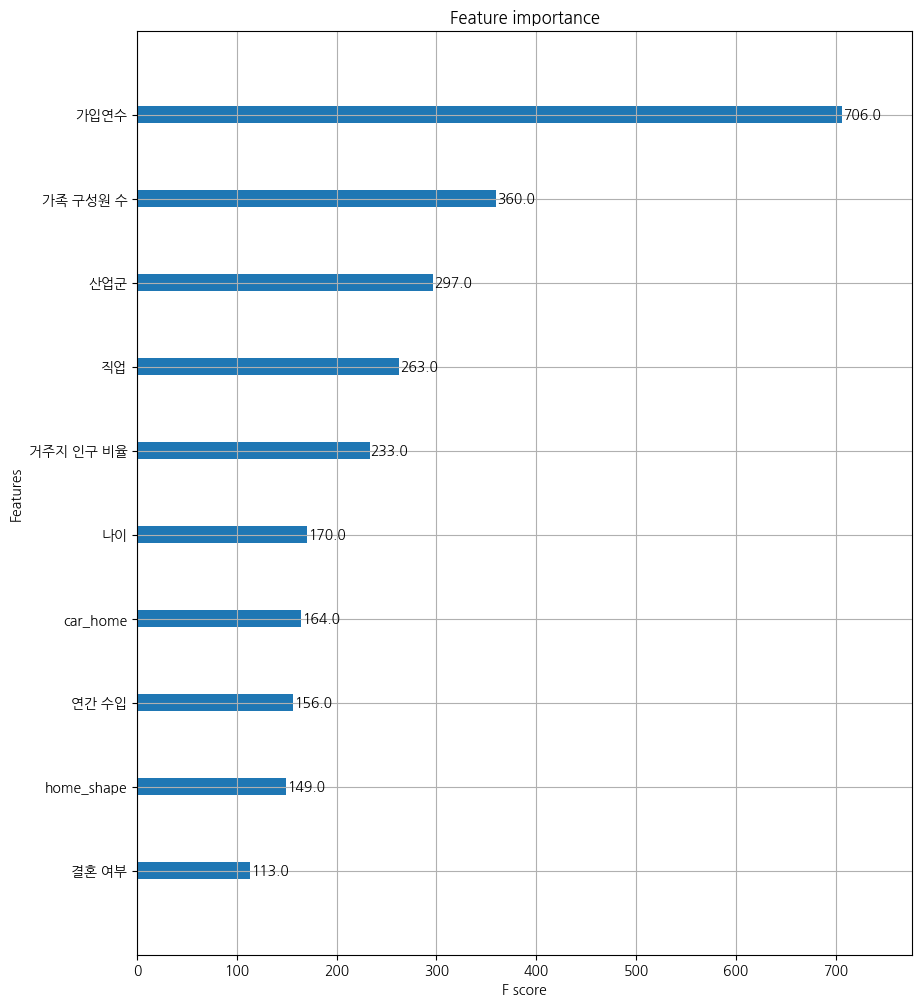

In [143]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

# Set the font path for Korean characters
font_path = "C:\\WINDOWS\\FONTS\\NanumGothic.ttf"  # Change this path according to your system

# Set the font properties
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Plot the importance
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)